In [2]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist

In [76]:
X, y = datasets.make_blobs(centers = 3, n_samples = 500, n_features = 2 , shuffle= True , random_state= 30)
print(X.shape,y.shape)

(500, 2) (500,)


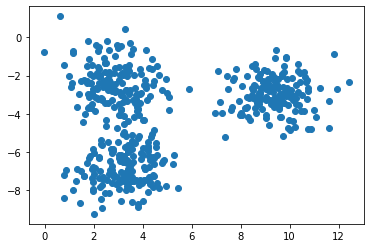

In [5]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [6]:
def init_centers(X, K):
  return X[np.random.choice(X.shape[0], K ,replace = False)]
def asign_label(X, centers):
  D = cdist(X,centers)
  return np.argmin(D,axis = 1)

def update_centers(X,labels, K):
  centers = np.zeros((K,X.shape[1]))
  for k in range(K):
    Xk = X[labels == k, :]
    centers[k,:] = np.mean(Xk,axis =0)
  return centers
def has_converged(centers,new_center):
  return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_center]))
def k_means(X, K):
  centers = [init_centers(X,K)]
  labels =[]
  it =0
  while True:
    labels.append(asign_label(X,centers[-1]))
    new_center = update_centers(X,labels[-1],K)
    if(has_converged(centers[-1],new_center)):
      break
    centers.append(new_center)
    it+=1
  return (centers,labels,it)


     

In [28]:
(centers,labels, it)= k_means(X,3)

In [ ]:
def display(X,label,centers):
  plt.scatter(centers[:,0],centers[:,1],linewidths = 10,marker ="^")
  K = np.amax(label) + 1
  X0 = X[label ==0,:]
  X1=X[label ==1, :]
  X2= X[label == 2, :]
  X3= X[label == 3, :]
  plt.plot(X0[:,0],X0[:,1],'^b',markersize = 4 , alpha =.8)
  plt.plot(X1[:,0],X1[:,1],'go',markersize = 4 , alpha =.8)
  plt.plot(X2[:,0],X2[:,1],'rs',markersize = 4 , alpha =.8)
  plt.plot(X3[:,0],X3[:,1],'co',markersize = 4 , alpha =.8)

  plt.axis('equal')
  plt.plot()
  plt.show()
for i in range(len(labels)):
  display(X,labels[i],centers[i])
  

In [37]:
(centers,labels, it)= k_means(X,2)

In [ ]:
for i in range(len(labels)):
  display(X,labels[i],centers[i])

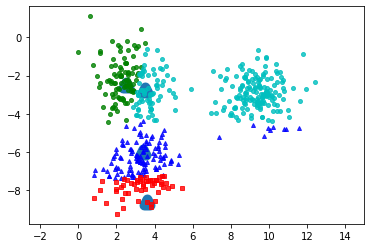

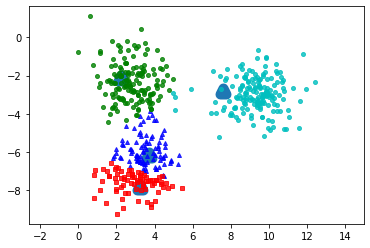

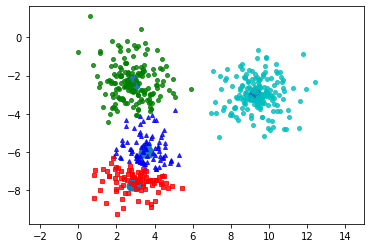

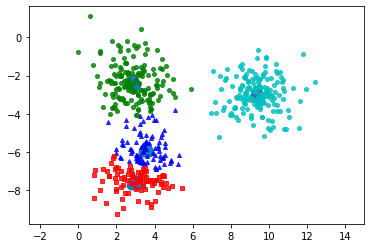

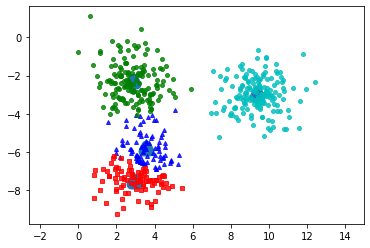

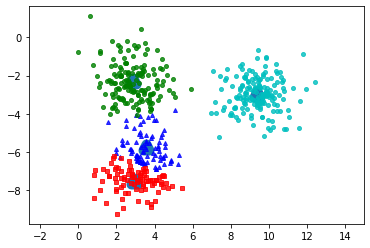

In [40]:
(centers,labels, it)= k_means(X,4)
for i in range(len(labels)):
  display(X,labels[i],centers[i])

In [72]:
from sklearn.cluster import kmeans_plusplus

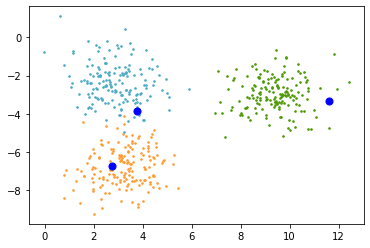

In [77]:
centers_init, indices = kmeans_plusplus(X, n_clusters=3, random_state=0)
colors = ["#4EACC5", "#FF9C34", "#4E9A06"]
for k, col in enumerate(colors):
    cluster_data = y == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker=".", s=10)
plt.scatter(centers_init[:, 0], centers_init[:, 1], c="b", s=50)
plt.show()

In [60]:
(centers,labels, it)= k_means(X,3)
X0 = X[labels[-1] ==0,:]
X1=X[labels[-1] ==1, :]
X2= X[labels[-1] == 2, :]


In [61]:
X0.shape

(166, 2)

In [62]:
X1.shape

(170, 2)

In [63]:
X2.shape

(164, 2)

Số lượng điểm mỗi cluster gần như nhau


In [82]:
X0 = X0 + 0.001
X = np.concatenate((X,X0),axis = 0) 

In [83]:
X.shape

(666, 2)

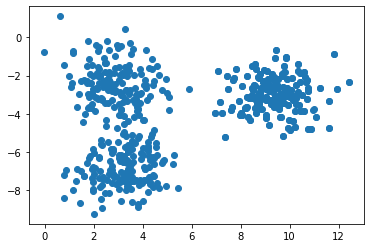

In [87]:
plt.scatter(X[:,0],X[:,1])
plt.show()


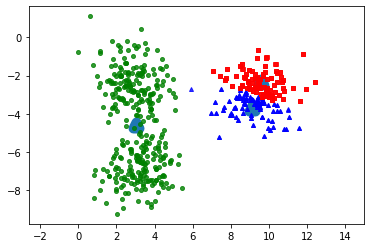

In [90]:
(centers,labels, it)= k_means(X,3)
display(X,labels[-1],centers[-1])